In [ ]:
# 16 17 프로젝트
# LLM 프로젝트 : 11/26,27
# 클라우드 배포 및 기타.. 12/18,19

# 최종 : 12/20

- 순서가 있는 시계열 데이터
  - 과거의 정보가 현재에 영향을 미치는 구조
  - 과거의 정보를 기억해서 출력을 내는 구조
  - RNN(Recurrent Nerual Network) 순환 신경망
    - NLP(자연어처리) 음성인식등 연속적인 순서가 중요한 데이터
    - 신경망과 유사함
    - 은닉상태가 이전 데이터의 출력값을 다음 데이터로 넘겨준

    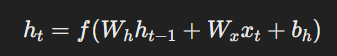


    

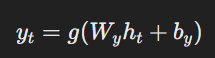

- RNN의 문제점
  - 입력데이터가 길어질수록 초기 정보가 점점 사라진다...
  - 변형 모델이 생기는데..
    - LSTM(Long Short-Term Memory)
     - 셀이라는 메커니즘을 오랜 시간동안 유지하거나 삭제
    - GRU(Gated Recurrent Unit) :LSTM의 단순버전
      - 게이트를 적게사용하면서 복잡도를 줄인 구조

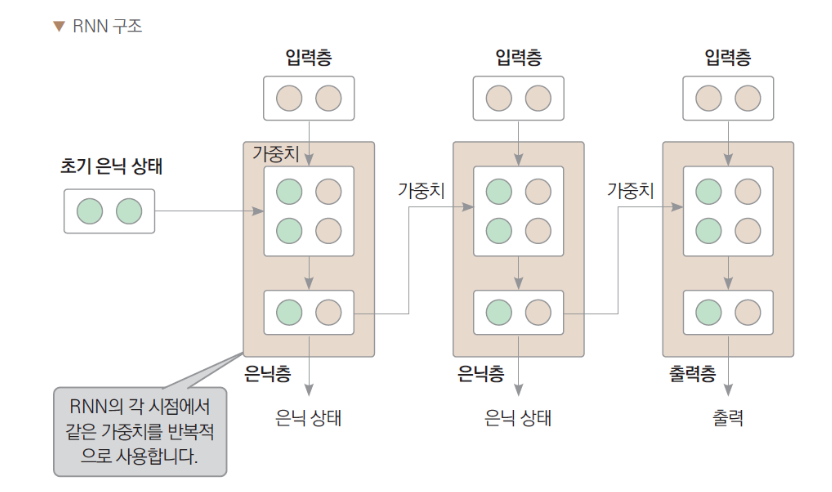

In [ ]:
# 나는 오늘 날씨가 정말 좋다고 생각한다.

In [ ]:
!unzip '/content/주가예측.zip'

Archive:  /content/주가예측.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Date,Open,High,Low,Volume,Close
0,2015-12-16,120,123,118,13181000,123
1,2015-12-17,124,126,122,17284900,123
2,2015-12-18,121,122,118,17948100,118
3,2015-12-21,120,120,116,11670000,117
4,2015-12-22,117,117,115,9689000,116


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    967 non-null    object
 1   Open    967 non-null    int64 
 2   High    967 non-null    int64 
 3   Low     967 non-null    int64 
 4   Volume  967 non-null    int64 
 5   Close   967 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 45.5+ KB


In [ ]:
# 탐색적 데이터 분석
# 데이터 분포 확인

In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

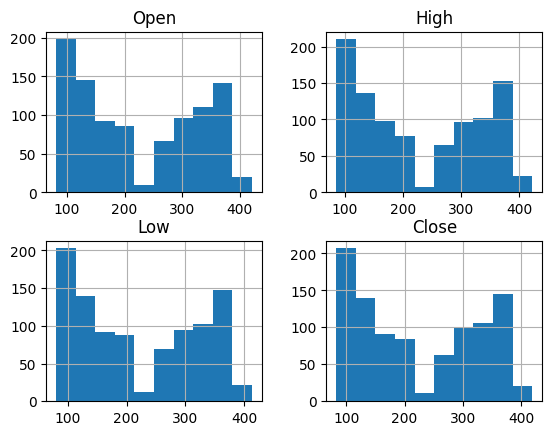

In [ ]:
# 개장가, 최고가, 최저가, 종가
data = df.loc[:,'Open':'Low']
data['Close'] = df['Close']
data.hist()

In [ ]:
# 데이터읽어서 정규화도  데이터셋
import numpy as np
from torch.utils.data import Dataset
class NDataSet(Dataset):
  # 초기화 데이터 로드
  def __init__(self):
    self.csv = pd.read_csv('/content/train.csv')
    # 정규화
    self.data = self.csv.loc[:,'Open':'Low'].values
    self.data = self.data / np.max(self.data) # 0과 1사이로 정규화
    # 정답 정규화
    self.label = self.csv['Close'].values
    self.label = self.label / np.max(self.label)  # __len__
  def __len__(self):
    return len(self.data) - 30 # 배치크기만큼 전체데이터에서 빼준다.
  # __getitem__  # 배치크기 정하기  30일 단위로
  def __getitem__(self,i):
    data = self.data[i:i+30]
    label = self.label[i+30]
    return data, label


In [ ]:
pd.read_csv('/content/train.csv')

,Date,Open,High,Low,Volume,Close
0,2015-12-16,120,123,118,13181000,123
1,2015-12-17,124,126,122,17284900,123
2,2015-12-18,121,122,118,17948100,118
3,2015-12-21,120,120,116,11670000,117
4,2015-12-22,117,117,115,9689000,116
...,...,...,...,...,...,...
962,2019-10-14,284,287,282,5513200,286
963,2019-10-15,284,286,279,7685600,284
964,2019-10-16,283,288,281,16175900,286
965,2019-10-17,304,309,288,38258900,293


In [ ]:
dataset = NDataSet()
data,label = next(iter(dataset))
data,label = next(iter(dataset))
data

array([[0.28368794, 0.29078014, 0.27895981],
       [0.29314421, 0.29787234, 0.28841608],
       [0.28605201, 0.28841608, 0.27895981],
       [0.28368794, 0.28368794, 0.27423168],
       [0.27659574, 0.27659574, 0.27186761],
       [0.27659574, 0.28132388, 0.27423168],
       [0.27895981, 0.28132388, 0.27659574],
       [0.27659574, 0.27659574, 0.26950355],
       [0.27895981, 0.28368794, 0.27659574],
       [0.28132388, 0.28132388, 0.27423168],
       [0.27423168, 0.27659574, 0.26950355],
       [0.25768322, 0.26004728, 0.24822695],
       [0.26004728, 0.26241135, 0.25059102],
       [0.24822695, 0.27895981, 0.24822695],
       [0.27423168, 0.28841608, 0.26477541],
       [0.27423168, 0.27895981, 0.26241135],
       [0.26477541, 0.27659574, 0.26241135],
       [0.27423168, 0.27895981, 0.27186761],
       [0.26950355, 0.26950355, 0.24822695],
       [0.25059102, 0.25768322, 0.23877069],
       [0.24113475, 0.25059102, 0.24113475],
       [0.25295508, 0.26004728, 0.25059102],
       [0.

In [ ]:
# RNN 클래스 정의
import torch
import torch.nn as nn

In [ ]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    # input_size 입력데이터크기(개장가,최고가,최저가)
    # hidden_size 은닉층의 개수
    # num_lyaers RNN을 5개 쌓는다
    # batch_first 입력데이이터를 (배치크기,시퀀스길이,입력크기)  (none,30,3)
    # 10 * 8 * 3 시퀀스*은닉층*입력데이터 크기
    self.rnn = nn.RNN(input_size = 3,hidden_size=8,num_layers=5,batch_first=True)
    # 분류기  예측  FC, MLP층 정의
    self.fc1 = nn.Linear(in_features= 240, out_features=64)
    self.fc2 = nn.Linear(in_features=64 , out_features=1)
    self.relu = nn.ReLU()
  def forward(self,x, h0): # x는 입력데이터 h0 초기 은닉상태
    x, hn = self.rnn(x, h0) # 출력 x(모든 타입스템에 대한 출력)와 최종은닉상태 hn을 반환
    # MLP 층으로 입력 모양 변경
    x = torch.reshape(x, (x.shape[0],-1))
    # mlp 층
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    # 예측한 종가를 1차원 벡터로 표현
    x = torch.flatten(x)
    return x

In [ ]:
# 데이터 로더
from torch.utils.data import DataLoader
dataset = NDataSet()
loader = DataLoader(dataset,batch_size=32)

In [ ]:
# 모델정의
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = RNN().to(device)

In [ ]:
# 최적화
from torch.optim.adam import Adam
optim = Adam(params=model.parameters(),lr=0.001)

In [ ]:
from tqdm import tqdm
# 학습루프 정의
for epoch in range(200):
  iterator = tqdm(loader)
  for data,label in iterator:
    # 기울기 초기화
    optim.zero_grad()
    # 초기 은닉상태  모든 값을 0으로 초기화
    #(레이어수, 데이터의개수,hidden size)
    h0 = torch.zeros(5,data.shape[0],8).to(device)
    # 예측
    pred = model(data.type(torch.FloatTensor).to(device), h0)
    # 손실함수 계산
    loss = nn.MSELoss()(pred,label.type(torch.FloatTensor).to(device))
    # 역전파
    loss.backward()
    # 최적화
    optim.step()
    iterator.set_description(f'epoch:{epoch} loss:{loss.item()}')
torch.save(model.state_dict(), './rnn.pth') # 모델 저장


epoch:199 loss:0.0009359500836580992: 100%|██████████| 30/30 [00:00<00:00, 39.34it/s]


In [ ]:
# 모델 성능평가

In [ ]:
import matplotlib.pyplot as plt
loader = DataLoader(dataset,batch_size=1) # 마지막 30일 데이터
# 예측값 저장 리스트
preds = []
totla_loss = 0

with torch.no_grad():
  # 모델의 가중치를 불러오기
  model.load_state_dict(torch.load('./rnn.pth',map_location=device,weights_only=False))
  for data, label in loader:
    h0 = torch.zeros(5,data.shape[0],8).to(device)  # 레이어수, 데이터개수, 히든사이즈
    pred = model(data.type(torch.FloatTensor).to(device), h0)
    # 예측값을 리스트에 추가
    preds.append(pred.item())
    # 손실값을 계산
    loss = nn.MSELoss()(pred,label.type(torch.FloatTensor).to(device))
    totla_loss += loss/len(loader)

print(f"loss : {totla_loss.item()}")


loss : 0.007760884705930948


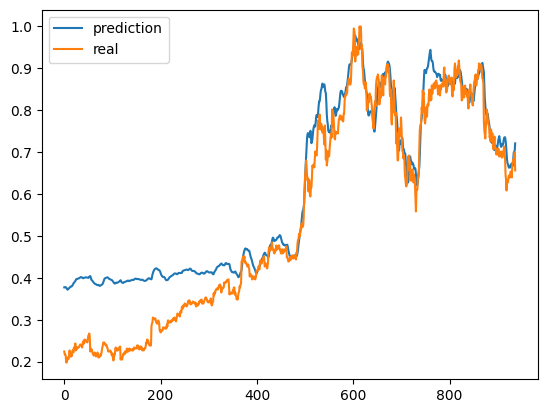

In [ ]:
# 시각화
plt.plot(preds, label = 'prediction')
plt.plot(dataset.label[30:], label = 'real')
plt.legend()
plt.show()


In [120]:
# lotto 예측
import pandas as pd

In [121]:
df1 = pd.read_excel('/content/lotto1.xlsx',header=1)
df2 = pd.read_excel('/content/lotto2.xlsx',header=1)

In [122]:
# 기준회차는 10회차
df = pd.concat([df2,df1])
df = df.iloc[:,-7:-1]
df.columns = ['no1','no2','no3','no4','no5','no6']
df.to_csv('lotto.csv',index=False)
df.head()

,no1,no2,no3,no4,no5,no6
0,1,2,3,4,5,6
1,7,10,22,29,31,38
2,5,12,15,30,37,40
3,14,16,19,20,29,34
4,4,9,12,15,33,45


In [ ]:
# window size = 10
# 데이터셋 정의
# 데이터로더
# 모델 생성
# 컴파일
# 학습
# 예측 (다중클래스 6개번호 예측)

In [138]:
# 데이터읽어서 정규화도  데이터셋
import numpy as np
from torch.utils.data import Dataset
class NLottoSet(Dataset):
  # 초기화 데이터 로드
  def __init__(self):
    self.data = pd.read_csv('/content/lotto.csv')
  def __len__(self):
    return len(self.data) - 10 # 배치크기만큼 전체데이터에서 빼준다.
  # __getitem__  # 배치크기 정하기  30일 단위로
  def __getitem__(self,i):
    data = self.data[i:i+10].values
    label = self.data.iloc[i+10].values
    return torch.tensor(data,dtype=torch.float32), torch.tensor(label,dtype=torch.float32)

In [139]:
lotto = NLottoSet()
data,label = next(iter(lotto))
data

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 7., 10., 22., 29., 31., 38.],
        [ 5., 12., 15., 30., 37., 40.],
        [14., 16., 19., 20., 29., 34.],
        [ 4.,  9., 12., 15., 33., 45.],
        [21., 33., 35., 38., 42., 44.],
        [ 1.,  6., 13., 19., 21., 33.],
        [ 3.,  7.,  9., 13., 19., 24.],
        [13., 14., 20., 28., 29., 34.],
        [ 6.,  7., 19., 28., 34., 41.]])

In [148]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    # input_size 입력데이터크기(개장가,최고가,최저가)
    # hidden_size 은닉층의 개수
    # num_lyaers RNN을 5개 쌓는다
    # batch_first 입력데이이터를 (배치크기,시퀀스길이,입력크기)  (none,30,3)
    self.rnn = nn.RNN(input_size = 6,hidden_size=8,num_layers=5,batch_first=True)
    # 분류기  예측  FC, MLP층 정의
    self.fc1 = nn.Linear(in_features= 80, out_features=40)
    self.fc2 = nn.Linear(in_features=40 , out_features=6)
    self.relu = nn.ReLU()
  def forward(self,x, h0): # x는 입력데이터 h0 초기 은닉상태
    x, hn = self.rnn(x, h0) # 출력 x(모든 타입스템에 대한 출력)와 최종은닉상태 hn을 반환
    # MLP 층으로 입력 모양 변경
    x = torch.reshape(x, (x.shape[0],-1))
    # mlp 층
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    # 예측한 종가를 1차원 벡터로 표현
    x = torch.flatten(x)
    return x

In [149]:
model = RNN().to(device)
optim = Adam(params=model.parameters(),lr=0.001)
from tqdm import tqdm
# 학습루프 정의
for epoch in range(10):
  iterator = tqdm(loader)
  for data,label in iterator:
    # 기울기 초기화
    optim.zero_grad()
    # 초기 은닉상태  모든 값을 0으로 초기화
    #(레이어수, 데이터의개수,hidden size)
    h0 = torch.zeros(5,data.shape[0],8).to(device)
    # 예측
    pred = model(data.type(torch.FloatTensor).to(device), h0)
    # 손실함수 계산
    loss = nn.MSELoss()(pred,label.type(torch.FloatTensor).to(device))
    # 역전파
    loss.backward()
    # 최적화
    optim.step()
    iterator.set_description(f'epoch:{epoch} loss:{loss.item()}')
torch.save(model.state_dict(), './rnn_lotto.pth') # 모델 저장


  0%|          | 0/1132 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1, 6])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch:9 loss:38.495662689208984: 100%|██████████| 1132/1132 [00:16<00:00, 70.13it/s]


In [157]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
lotto = NLottoSet()
loader = DataLoader(lotto,batch_size=1) # 마지막 10회차 데이터
# 예측값 저장 리스트
preds = []
totla_loss = 0

with torch.no_grad():
  # 모델의 가중치를 불러오기
  model.load_state_dict(torch.load('./rnn_lotto.pth',map_location=device,weights_only=False))
  for data, label in loader:
    h0 = torch.zeros(5,data.shape[0],8).to(device)  # 레이어수, 데이터개수, 히든사이즈
    pred = model(data.type(torch.FloatTensor).to(device), h0)
    # 예측값을 리스트에 추가
    preds.append(pred)
    # 손실값을 계산
    loss = nn.MSELoss()(pred,label.type(torch.FloatTensor).to(device))
    totla_loss += loss/len(loader)

print(f"loss : {totla_loss}")



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1, 6])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss : 44.236900329589844


In [159]:
import numpy as np
np.round( preds[-1] )

tensor([ 6., 13., 21., 27., 34., 40.])

In [160]:
# 승겍데이터 - 시카고 데이터 포럼 다운로드 -

In [162]:
import tensorflow as tf
tf.keras.utils.get_file(
    "ridership.tgz",
    "https://github.com/ageron/data/raw/main/ridership.tgz",
    cache_dir=".",
    extract=True
)

108512/108512 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'./datasets/ridership.tgz'

In [164]:
df = pd.read_csv('/content/datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv')
df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [165]:
# W 평일 A 토요일 U 공휴일
# 일별 버스와 철도 이용객수

In [171]:
df['service_datetime'] = pd.to_datetime(df['service_date'])
# df.set_index('service_date',inplace=True)

In [178]:
df['year'] = df['service_datetime'].dt.year
df['month'] = df['service_datetime'].dt.month
df['day'] = df['service_datetime'].dt.day
df['weekday'] = df['service_datetime'].dt.weekday

<Axes: xlabel='service_datetime'>

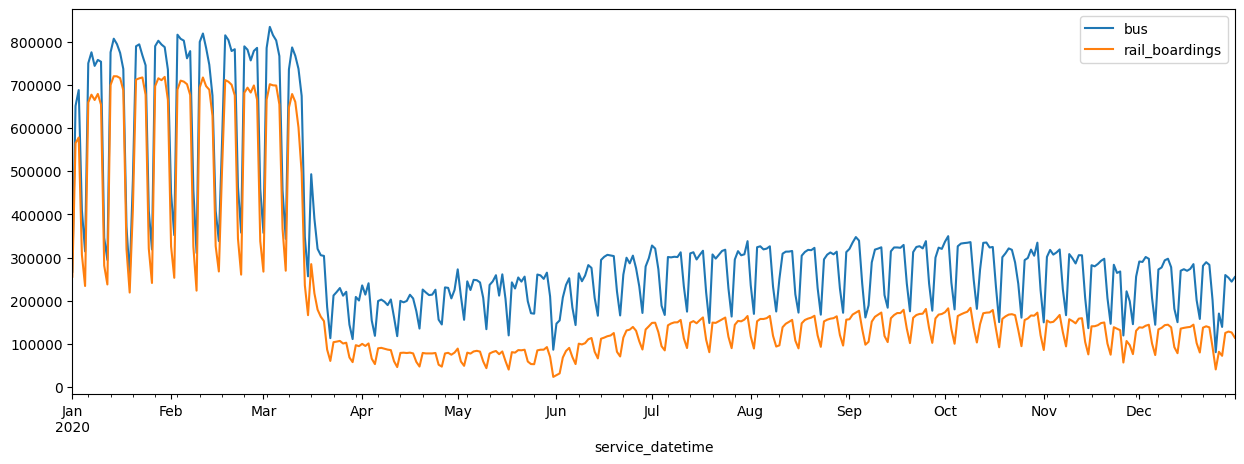

In [195]:
# 2020도 버스와 철도의 승객수 - 추이
temp = df[df['year'] == 2020]  # 'bus	rail_boardings'
temp.set_index('service_datetime',inplace=True)
temp[['bus',	'rail_boardings']].plot(figsize=( 15,5  ))

<Axes: xlabel='service_datetime'>

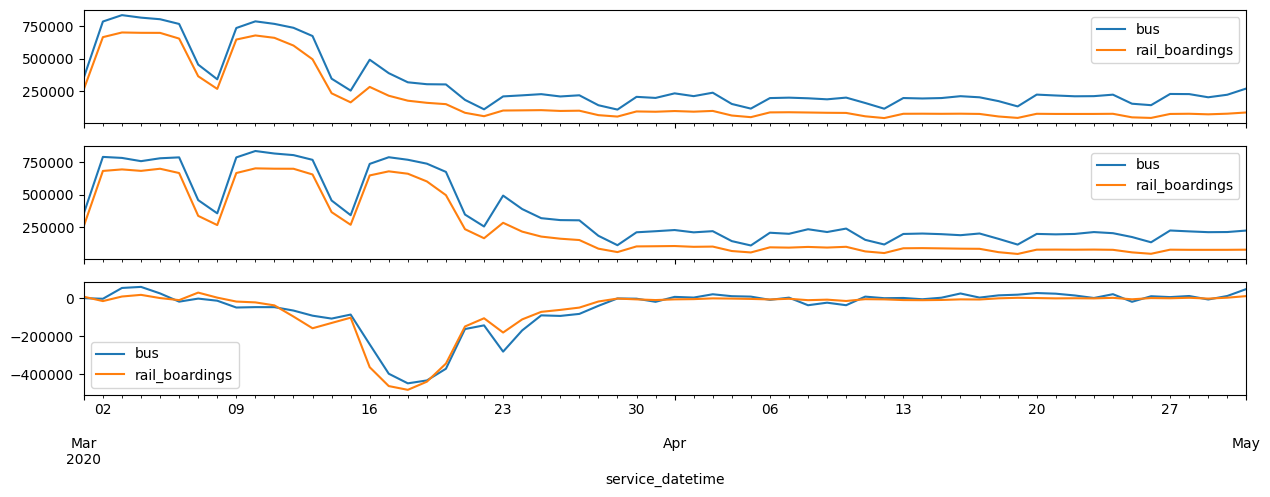

In [203]:
fig,axs = plt.subplots(3,1,sharex=True,figsize=(8,5))
# 2020 3 ~ 2020 5
diff_7 = temp[['bus',	'rail_boardings']].diff(7)['2020-03-01' : '2020-05-01']
# 원본데이터
temp[['bus',	'rail_boardings']]['2020-03-01' : '2020-05-01'].plot(ax=axs[0],figsize=( 15,5  ))
# temp[['bus',	'rail_boardings']]['2020-03-01' : '2020-05-01'].plot(ax=axs[0],figsize=( 15,5  ))
shift_7 = temp[['bus',	'rail_boardings']].shift(7)['2020-03-01' : '2020-05-01']
shift_7.plot(ax=axs[1])  # 데이터를 앞으로 또는 뒤로 이동시킬때 사용
diff_7.plot(ax=axs[2]) # 데이터의 차이를 계산


- ARMA 모델
  - Autoregressive moving average)
  - 자기 회귀 이동 평균
  - AR(Autoregressive) : 자기회귀
    - 현재데이터는 과거데이터와 연관이 있다고 가정
    - 어제주가가 오늘 주가에 영향을 미친다고 가정
  - I(Intergrated 차분)
    - 데이터가 시간에따라서 변화는 추세를 보이면 그 추세를 제거는 과정
    - 차분 : 데이터를 이전값과의 차이로 변환해서 추이를 없앤다
    - d(차수) 몇번 차분했는지 , 1차분은 데이터를 한번 차분
      - 데이터의 변동을 평탄하게한다.
  - MA:Moving Average 이동평균
    - 현재데이터는 이전데이터의 오차에 영향을 받는다는 가정
    - 예측과 실제의 사이의 오류를 이용해서 모델
  - (p,d,q)
    - p : 자기회귀 항의 차수
    - d : 차분의 차수
    - q : 이동평균 항의 차수
  - ARIMA(2,1,1)
    - 2 : 이전 두 데이터의 포인트를 참고하는 자귀회귀
    - 1 : 1차분
    - 1 : 이전 한개의 예측오차를 고려하는 이동평
  - 계절성 모델(seasonal ARIMA , SARIMA)
    - 계절 항을 추가하는 모델링


In [221]:
# 열차 시계열에 SARIMA 모델을 적용 - 다음날 승객수 예측
from statsmodels.tsa.arima.model import ARIMA
origin,today = pd.to_datetime("2020-01-01"), pd.to_datetime("2020-05-31")
time_period = pd.date_range(origin,today)
df2 = df.set_index('service_datetime')
# 중복된 날자제거
df2.drop_duplicates(inplace=True)
rail_series = df2.loc[origin:today]['rail_boardings'].asfreq('D')
model = ARIMA(rail_series,order=(1,0,0), seasonal_order=(0,1,1,7) )
model = model.fit()
y_pred = model.forecast()
y_pred[0]

<ipython-input-221-a07751f38225>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred[0]


45339.46851530768

In [227]:
df2.loc[pd.to_datetime("2020-06-01")]['rail_boardings']

27517

- 손실함수, 수치미분, 기울기

- 손실함수
  - 오차를 함수로 나타낸것
  - 이를 최소화 하는게 학습목표
  - 대표적인 손실함수
    - MSE : 회귀
    - Cross - Entropy : 분류

In [236]:
# MES loss
import torch
import torch.nn as nn
# 예측값과 실제값을
y_pred = torch.tensor([3.0, 4.5, 2.1], requires_grad=True)
y_true = torch.tensor([3.0, 4.0, 2.0])
# mes
loss_fn = nn.MSELoss()
loss = loss_fn(y_pred, y_true)
print(f"손실값 : {loss.item()}")

# 역전파를 통해서 기울기 계산
loss.backward()
print(f"기울기 : {y_pred.grad}")

손실값 : 0.08666666597127914
기울기 : tensor([0.0000, 0.3333, 0.0667])


- 수치미분
  - 함수의 기울기를 구하(근사적으로)는 방법
  - f'(x) = (f(x+h) - f(x)) / h   h(아주 작은 값)

  
  
  


In [239]:
1.0+1e-5

1.00001

In [240]:
# f(x) = x^2
def f(x):
  return x**2

# 수치미분 함수를 정의
def numeric_delta(f,x,h=1e-10):
  return (f(x+h) - f(x)) / h

# x가 3에서 기울기
x = 3.0
grad = numeric_delta(f,x)
grad

6.000000496442226

- 기울기
  - 함수의 입력값에 대해서 출력값이 얼마나 변화는지 나타내는 값
  - 기울기는 경사 하강법등에서 사용되는 중요 개념
  - 손실함수를 최소화하기 위해서는 기울기를 활용

- pytorch에서 기울기 계산
 - 자동미분 autograd 기능을 제공
 - 손실함수의 기울기를 구하고 이를 바탕으로 파라메터를 업데이트하는 것이 학습의 기본 과정

In [241]:
import torch
# f(x) = x^2
# 입력데이터
x = torch.tensor(3.0,requires_grad=True)
# 함수 정의
y = x**2
y.backward()
x.grad

tensor(6.)

 - 오토 인코더
  - 데이터의 압축과 복원을 하는 목적
  - 입력데이터를 더 낮은 차원으로 압축한후 다시 원래차원으로 복구하는 과정
  - 인코더
  - 디코더
  

In [242]:
# MNIST데이터를 이용

In [243]:
# 데이터셋로드 전처리
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms